In [106]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

%matplotlib inline

In [107]:
df = pd.read_csv('./data/2d-sample-data.csv')
df.head()

,Name,Age,Salary
0,a,27,70000
1,b,29,90000
2,c,29,61000
3,d,28,60000
4,e,42,150000


Text(0, 0.5, 'Salary')

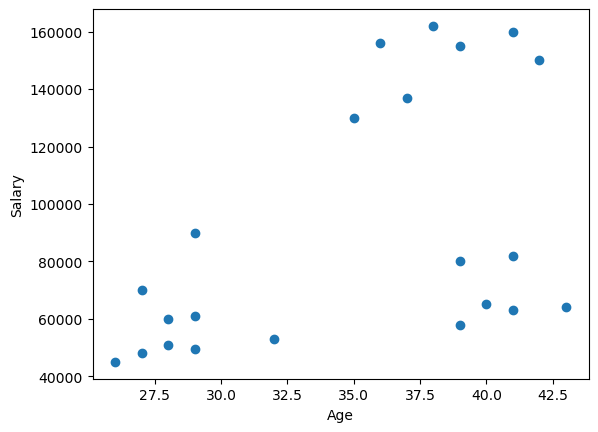

In [108]:
plt.scatter(df.Age, df.Salary)
plt.xlabel('Age')
plt.ylabel('Salary')

In [109]:
filteredDf = df[['Age', 'Salary']]
filteredDf.head()

,Age,Salary
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [110]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(filteredDf)
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [111]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Salary,cluster
0,a,27,70000,1
1,b,29,90000,1
2,c,29,61000,2
3,d,28,60000,2
4,e,42,150000,0


In [112]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [113]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

df1.head()
df2.head()

,Name,Age,Salary,cluster
0,a,27,70000,1
1,b,29,90000,1
19,t,39,80000,1
20,u,41,82000,1


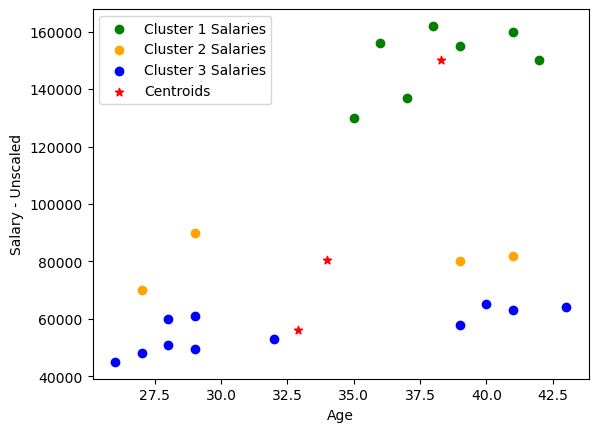

In [114]:
plt.scatter(df1.Age, df1.Salary, color='green', label='Cluster 1 Salaries')
plt.scatter(df2.Age, df2.Salary, color='orange', label='Cluster 2 Salaries')
plt.scatter(df3.Age, df3.Salary, color='blue', label='Cluster 3 Salaries')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', marker='*', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Salary - Unscaled')

plt.legend()
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])

# After scaling using MinMaxScaler

In [115]:
scaledDf = df
scaledDf.head()

,Name,Age,Salary,cluster
0,a,27,70000,1
1,b,29,90000,1
2,c,29,61000,2
3,d,28,60000,2
4,e,42,150000,0


In [116]:
scaler = MinMaxScaler()

scaler.fit(scaledDf[['Salary']])
scaledDf.Salary = scaler.transform(scaledDf[['Salary']])

scaler.fit(scaledDf[['Age']])
scaledDf.Age = scaler.transform(scaledDf[['Age']])

scaledDf.head()

,Name,Age,Salary,cluster
0,a,0.058824,0.213675,1
1,b,0.176471,0.384615,1
2,c,0.176471,0.136752,2
3,d,0.117647,0.128205,2
4,e,0.941176,0.897436,0


In [117]:
scaledDfFiltered = scaledDf[['Age', 'Salary']]
scaledDfFiltered.head()

,Age,Salary
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [118]:
km_post_scaling = KMeans(n_clusters=3)
clustersPostScaling = km_post_scaling.fit_predict(scaledDfFiltered)
clustersPostScaling

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [119]:
scaledDf['clustersPostScaling'] = clustersPostScaling
scaledDf

,Name,Age,Salary,cluster,clustersPostScaling
0,a,0.058824,0.213675,1,1
1,b,0.176471,0.384615,1,1
2,c,0.176471,0.136752,2,1
3,d,0.117647,0.128205,2,1
4,e,0.941176,0.897436,0,2
5,f,0.764706,0.940171,0,2
6,g,0.882353,0.982906,0,2
7,h,0.705882,1.000000,0,2
8,i,0.588235,0.948718,0,2
9,j,0.529412,0.726496,0,2


In [120]:
scaledDf['Original_Age'] = df.Age
scaledDf['Original_Salary'] = df.Salary
scaledDf

,Name,Age,Salary,cluster,clustersPostScaling,Original_Age,Original_Salary
0,a,0.058824,0.213675,1,1,0.058824,0.213675
1,b,0.176471,0.384615,1,1,0.176471,0.384615
2,c,0.176471,0.136752,2,1,0.176471,0.136752
3,d,0.117647,0.128205,2,1,0.117647,0.128205
4,e,0.941176,0.897436,0,2,0.941176,0.897436
5,f,0.764706,0.940171,0,2,0.764706,0.940171
6,g,0.882353,0.982906,0,2,0.882353,0.982906
7,h,0.705882,1.000000,0,2,0.705882,1.000000
8,i,0.588235,0.948718,0,2,0.588235,0.948718
9,j,0.529412,0.726496,0,2,0.529412,0.726496


# Plotting post scaling

In [121]:
df4 = scaledDf[scaledDf.clustersPostScaling == 0]
df5 = scaledDf[scaledDf.clustersPostScaling == 1]
df6 = scaledDf[scaledDf.clustersPostScaling == 2]

df4.head()

,Name,Age,Salary,cluster,clustersPostScaling,Original_Age,Original_Salary
16,q,0.823529,0.170940,2,0,0.823529,0.170940
17,r,0.882353,0.153846,2,0,0.882353,0.153846
18,s,1.000000,0.162393,2,0,1.000000,0.162393
19,t,0.764706,0.299145,1,0,0.764706,0.299145
20,u,0.882353,0.316239,1,0,0.882353,0.316239


In [122]:
km_post_scaling.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

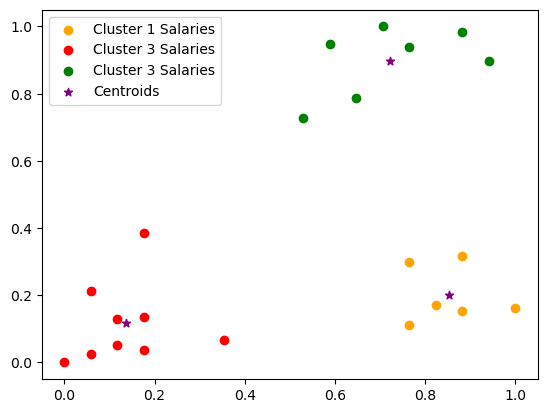

In [129]:
plt.scatter(df4.Age, df4.Salary, color='orange', label='Cluster 1 Salaries')
plt.scatter(df5.Age, df5.Salary, color='red', label='Cluster 3 Salaries')
plt.scatter(df6.Age, df6.Salary, color='green', label='Cluster 3 Salaries')

plt.scatter(km_post_scaling.cluster_centers_[:,0], km_post_scaling.cluster_centers_[:,1], color='purple', marker='*', label='Centroids')

plt.legend()

## Scaling did not improve results so far

## Elbow plot to check if the chosen cluster numbers is right

In [124]:
# Inertia or Sum of squared errors for cluster size = 3
km_post_scaling.inertia_

0.4750783498553096

In [125]:
scaledDfFiltered.head()

,Age,Salary
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [126]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km_range = KMeans(n_clusters=k)
    km_range.fit(scaledDfFiltered)
    sse.append(km_range.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.2621792762345213,
 0.21055478995472499,
 0.16869711728567788,
 0.13762504146528043,
 0.11073569527418642]

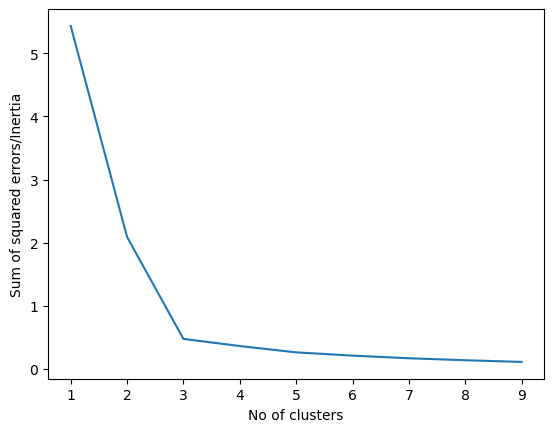

In [127]:
plt.xlabel('No of clusters')
plt.ylabel('Sum of squared errors/Inertia')
plt.plot(k_range, sse)